<a href="https://colab.research.google.com/github/IvanMach20/INFORMATICA-PARA-ECONOMISTAS-2025-I/blob/main/SEMANA_10_FUNDAMENTOS_B%C3%81SICOS_DE_ECONOMETR%C3%8DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFORMÁTICA PARA ECONOMISTAS - SEMANA 10

# FUNDAMENTOS BÁSICOS DE ECONOMETRÍA
# FACULTAD DE ECONOMÍA - UNCP
## DOCENTE: MSc. Ciro Ivan Machacuay Meza


# **¿Qué es la econometría?**

Es la rama de la economía que utiliza métodos matemáticos y estadísticos paraVanalizar datos económicos y probar teorías económicas, así como para hacer predicciones sobre el comportamiento de las variables económicas.

*En otras palabras, la econometría es la herramienta que permite analizar cuantitativamente la relación entre variables económicas, verificando modelos teóricos con datos reales y haciendo pronósticos sobre el futuro.* *texto en cursiva* *texto en cursiva*


In [4]:
# Importar librerías necesarias
from tabulate import tabulate
import pandas as pd

# Crear los datos
datos = {
    "Estudiante": [1, 2, 3, 4, 5],
    "Horas_Estudio": [1, 2, 3, 4, 5],
    "Nota_Examen": [4.5, 5.0, 6.2, 7.8, 9.0]
}

# Convertir a DataFrame
df = pd.DataFrame(datos)

# Opción 4: Usando pandas directamente (mejor para análisis)
print("\n=== DATAFRAME PANDAS ===")
display(df)  # Para Jupyter Notebook
# print(df.to_markdown())  # Alternativa para terminal


=== DATAFRAME PANDAS ===


,Estudiante,Horas_Estudio,Nota_Examen
0,1,1,4.5
1,2,2,5.0
2,3,3,6.2
3,4,4,7.8
4,5,5,9.0


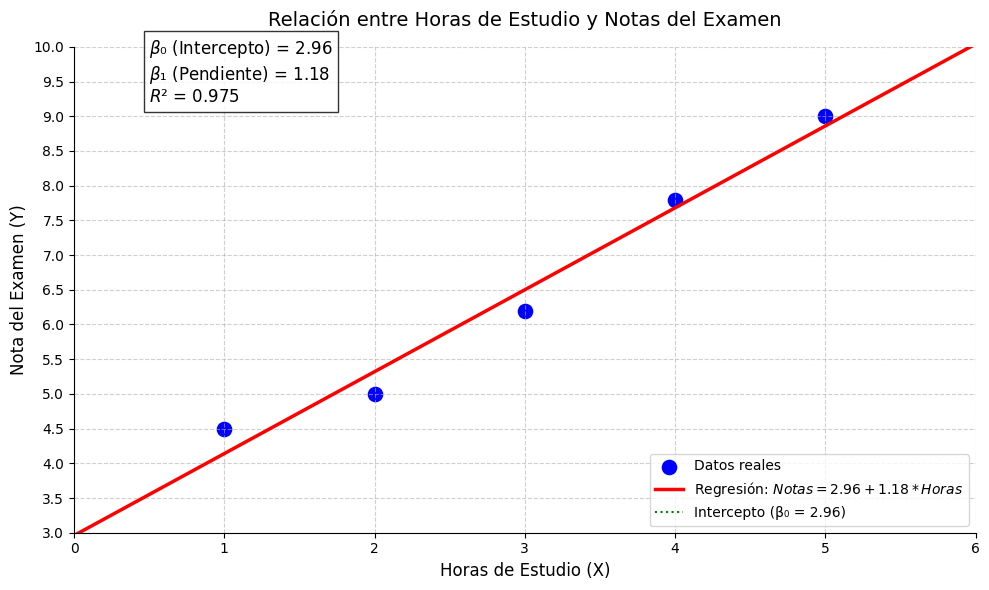

In [5]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Datos
horas_estudio = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
notas = np.array([4.5, 5.0, 6.2, 7.8, 9.0])

# Ajustar modelo de regresión
modelo = LinearRegression()
modelo.fit(horas_estudio, notas)

# Obtener coeficientes
β0 = modelo.intercept_
β1 = modelo.coef_[0]
r2 = modelo.score(horas_estudio, notas)

# Crear gráfico
plt.figure(figsize=(10, 6))

# 1. Gráfico de dispersión
sns.scatterplot(x=horas_estudio.flatten(), y=notas,
                color='blue', s=150, label='Datos reales')

# 2. Línea de regresión
x_pred = np.linspace(0, 6, 100).reshape(-1, 1)
y_pred = modelo.predict(x_pred)
plt.plot(x_pred, y_pred, color='red',
         linewidth=2.5, label=f'Regresión: $Notas = {β0:.2f} + {β1:.2f}*Horas$')

# 3. Personalización
plt.title('Relación entre Horas de Estudio y Notas del Examen',
          fontsize=14, pad=15)
plt.xlabel('Horas de Estudio (X)', fontsize=12)
plt.ylabel('Nota del Examen (Y)', fontsize=12)
plt.xticks(range(0, 7))
plt.yticks(np.arange(0, 10.5, 0.5))
plt.xlim(0, 6)
plt.ylim(3, 10)

# 4. Anotaciones
plt.text(0.5, 9.2,
         f'$β₀$ (Intercepto) = {β0:.2f}\n$β₁$ (Pendiente) = {β1:.2f}\n$R²$ = {r2:.3f}',
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# 5. Elementos adicionales
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=β0, color='green', linestyle=':',
            label=f'Intercepto (β₀ = {β0:.2f})')
plt.legend(fontsize=10)
sns.despine()

plt.tight_layout()
plt.show()

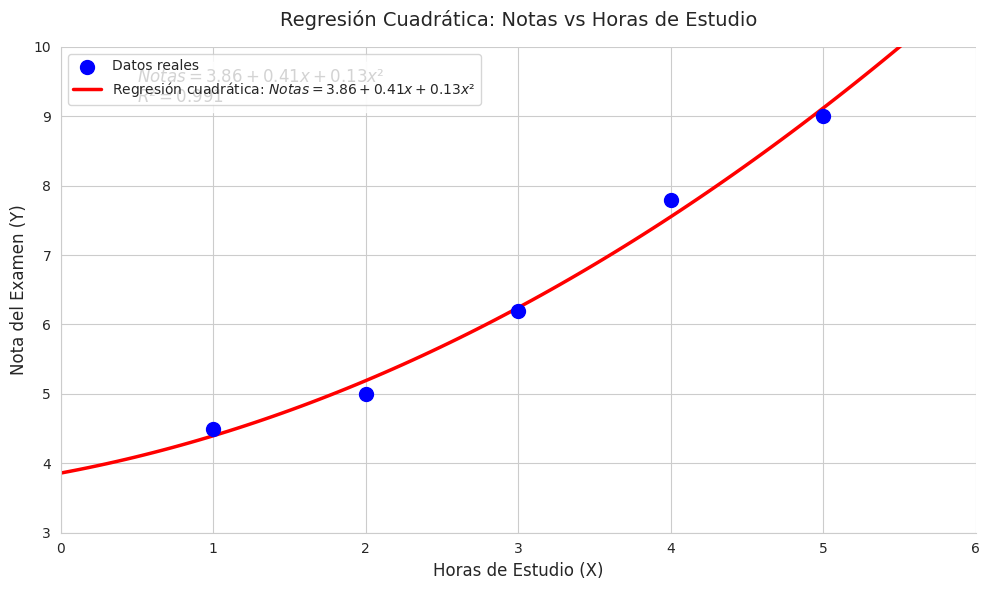


Coeficientes:
β₀ (Intercepto) = 3.8600
β₁ (Término lineal) = 0.4086
β₂ (Término cuadrático) = 0.1286
R² = 0.9913


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Datos
horas_estudio = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
notas = np.array([4.5, 5.0, 6.2, 7.8, 9.0])

# Transformación polinomial (grado 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(horas_estudio)

# Ajustar modelo
modelo = LinearRegression()
modelo.fit(X_poly, notas)

# Coeficientes
β0 = modelo.intercept_
β1 = modelo.coef_[1]
β2 = modelo.coef_[2]
r2 = modelo.score(X_poly, notas)

# Generar puntos para la curva
x_curve = np.linspace(0, 6, 100).reshape(-1, 1)
X_curve_poly = poly.transform(x_curve)
y_curve = modelo.predict(X_curve_poly)

# Gráfico
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# 1. Datos observados
plt.scatter(horas_estudio, notas, color='blue', s=100, label='Datos reales', zorder=5)

# 2. Curva de regresión
plt.plot(x_curve, y_curve, color='red', linewidth=2.5,
         label=f'Regresión cuadrática: $Notas = {β0:.2f} + {β1:.2f}x + {β2:.2f}x²$')

# 3. Personalización
plt.title('Regresión Cuadrática: Notas vs Horas de Estudio', fontsize=14, pad=15)
plt.xlabel('Horas de Estudio (X)', fontsize=12)
plt.ylabel('Nota del Examen (Y)', fontsize=12)
plt.xticks(range(0, 7))
plt.yticks(np.arange(0, 11, 1))
plt.xlim(0, 6)
plt.ylim(3, 10)

# 4. Anotaciones
ecuacion = f"$Notas = {β0:.2f} + {β1:.2f}x + {β2:.2f}x²$\n$R² = {r2:.3f}$"
plt.text(0.5, 9.2, ecuacion, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# 5. Elementos adicionales
plt.legend(fontsize=10, loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

# Resultados del modelo
print(f"\nCoeficientes:")
print(f"β₀ (Intercepto) = {β0:.4f}")
print(f"β₁ (Término lineal) = {β1:.4f}")
print(f"β₂ (Término cuadrático) = {β2:.4f}")
print(f"R² = {r2:.4f}")

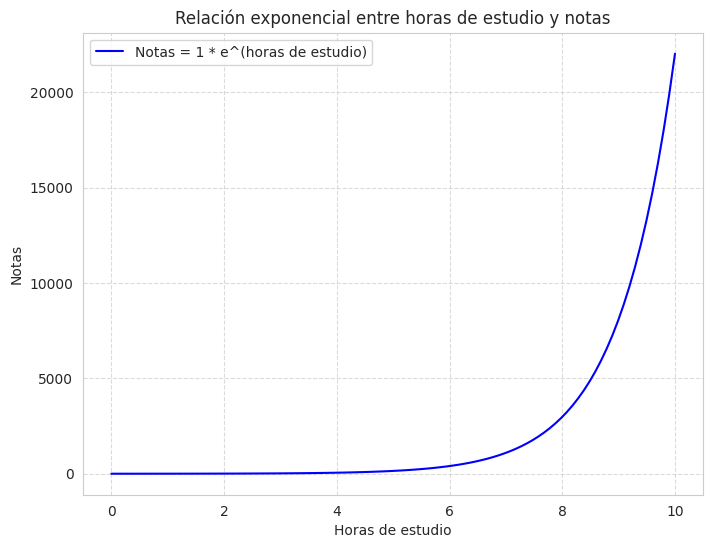

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los parámetros
beta_0 = 1  # Puedes ajustar este valor según tus necesidades
horas_estudio = np.linspace(0, 10, 100)  # Rango de horas de estudio (de 0 a 10)

# Calcular las notas
notas = beta_0 * np.exp(horas_estudio)

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(horas_estudio, notas, label=f'Notas = {beta_0} * e^(horas de estudio)', color='blue')
plt.xlabel('Horas de estudio')
plt.ylabel('Notas')
plt.title('Relación exponencial entre horas de estudio y notas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

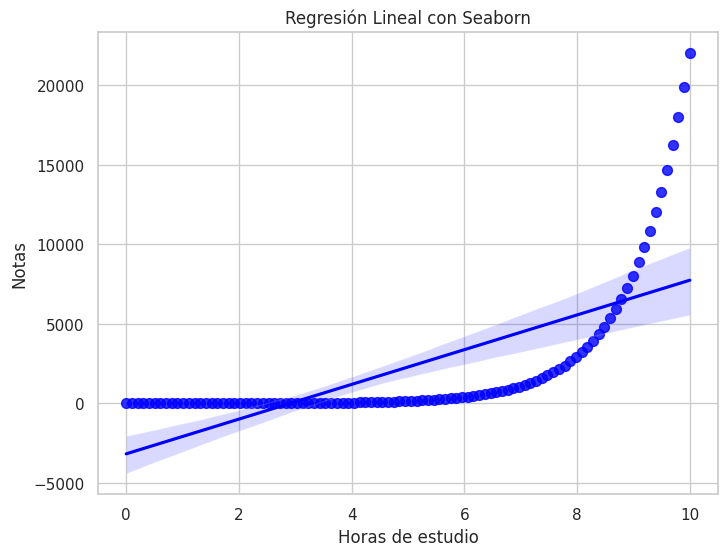

In [8]:
import seaborn as sns

# Gráfico automático con línea de regresión y intervalo de confianza
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.regplot(x=horas_estudio, y=notas, color='blue', scatter_kws={'s': 50})
plt.xlabel('Horas de estudio')
plt.ylabel('Notas')
plt.title('Regresión Lineal con Seaborn')
plt.show()

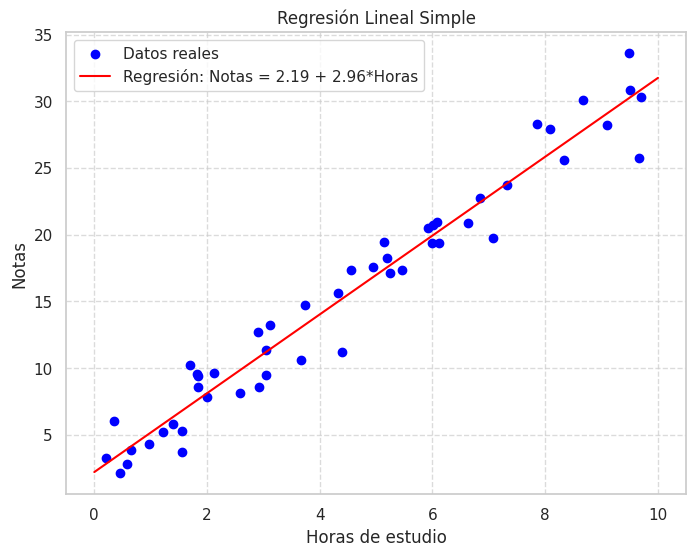

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generar datos sintéticos (ejemplo)
np.random.seed(42)
horas_estudio = np.random.rand(50) * 10  # 50 valores entre 0 y 10
notas = 2 + 3 * horas_estudio + np.random.randn(50) * 2  # Relación lineal con ruido

# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(horas_estudio.reshape(-1, 1), notas)  # X debe ser 2D

# Obtener coeficientes
beta_0 = modelo.intercept_  # Intercepto (ordenada al origen)
beta_1 = modelo.coef_[0]    # Pendiente

# Predecir valores para la línea de regresión
x_vals = np.linspace(0, 10, 100)
y_pred = beta_0 + beta_1 * x_vals

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(horas_estudio, notas, color='blue', label='Datos reales')
plt.plot(x_vals, y_pred, color='red', label=f'Regresión: Notas = {beta_0:.2f} + {beta_1:.2f}*Horas')
plt.xlabel('Horas de estudio')
plt.ylabel('Notas')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


MCO Manual:    β0 = 2.1934, β1 = 2.9553
Scikit-learn: β0 = 2.1934, β1 = 2.9553


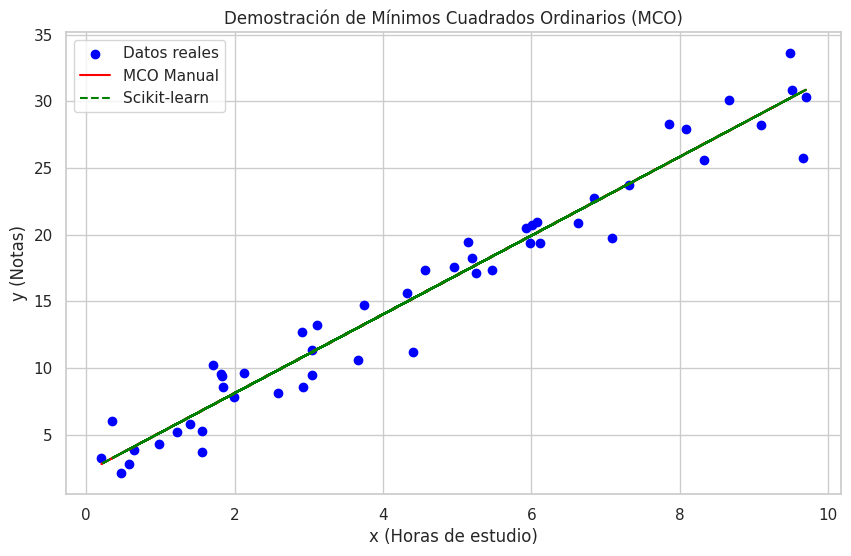

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generar datos sintéticos
np.random.seed(42)
x = np.random.rand(50) * 10  # Variable independiente
y = 2 + 3 * x + np.random.randn(50) * 2  # Variable dependiente con ruido

# --- Cálculo manual de MCO ---
# Calcular medias
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calcular covarianza y varianza de X
cov_xy = np.sum((x - x_mean) * (y - y_mean))
var_x = np.sum((x - x_mean) ** 2)

# Coeficientes MCO
beta_1 = cov_xy / var_x  # Pendiente
beta_0 = y_mean - beta_1 * x_mean  # Intercepto

# --- Comparación con scikit-learn ---
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
beta_1_sklearn = model.coef_[0]
beta_0_sklearn = model.intercept_

# Imprimir resultados
print(f"MCO Manual:    β0 = {beta_0:.4f}, β1 = {beta_1:.4f}")
print(f"Scikit-learn: β0 = {beta_0_sklearn:.4f}, β1 = {beta_1_sklearn:.4f}")

# --- Graficar resultados ---
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(x, beta_0 + beta_1 * x, color='red', label='MCO Manual')
plt.plot(x, beta_0_sklearn + beta_1_sklearn * x, '--', color='green', label='Scikit-learn')
plt.xlabel('x (Horas de estudio)')
plt.ylabel('y (Notas)')
plt.title('Demostración de Mínimos Cuadrados Ordinarios (MCO)')
plt.legend()
plt.grid(True)
plt.show()